**Import Libraries**

In [187]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [189]:
house_data = pd.read_csv('/content/Maison.csv')

In [190]:
house_data.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


**Data Transformation and Analysis**

In [191]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house_data = house_data.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

house_data.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


**Null Check**

In [192]:
house_data.isnull().sum()

price        0
area         0
rooms        0
bathroom     0
floors       0
driveway     0
game_room    0
cellar       0
gas          0
air          0
garage       0
situation    0
dtype: int64

**Check for any Qualitative Variables**

In [193]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


**Outlier Check**

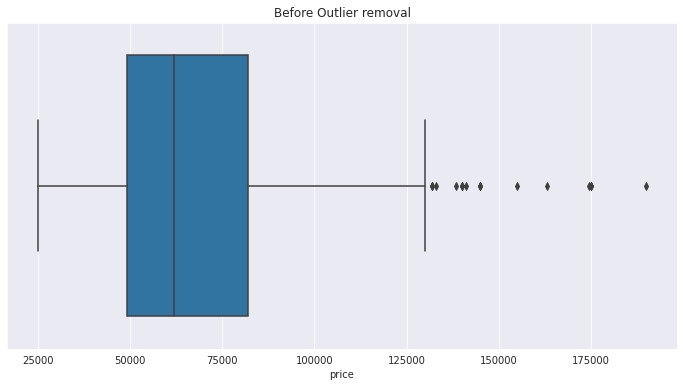

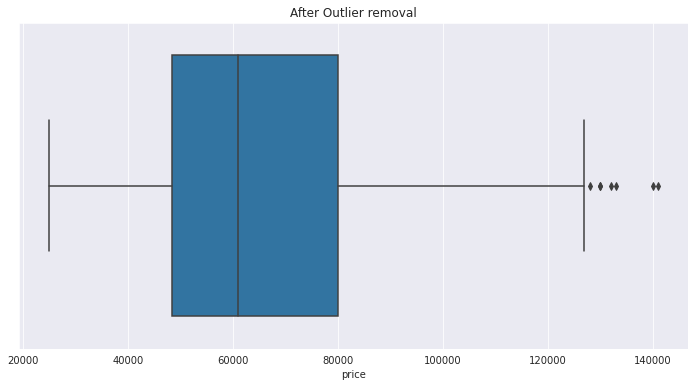

In [194]:
#Using z-score, beyond 3 are comsidered as outliers
from scipy import stats
import numpy as np

#Before Outlier removal
ax = sns.boxplot(house_data['price'])
ax.set_title('Before Outlier removal')
plt.show()
z = np.abs(stats.zscore(house_data))
threshold = 3
house_new_data = house_data[(z < threshold).all(axis=1)]

#After Outlier removal
ax = sns.boxplot(house_new_data['price'])
ax.set_title('After Outlier removal')
plt.show()

**Correlation Check**

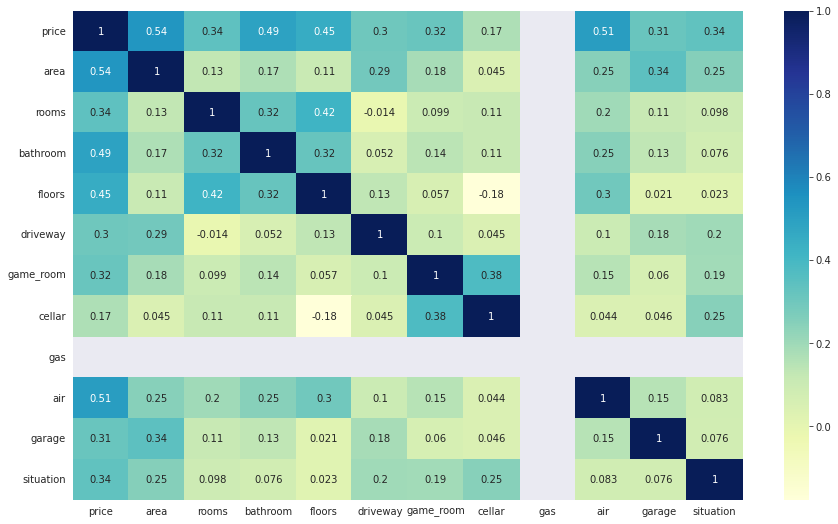

In [195]:
f, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(house_new_data.corr(), annot=True, cmap="YlGnBu")

**Dropping Duplicates**

In [196]:
#Dropping gas feature and correlation is coming NaN
house_new_data.drop(columns='gas', inplace=True)
house_new_data.drop_duplicates(keep='first', inplace=True)

**Nature of Relation and Relationship** 

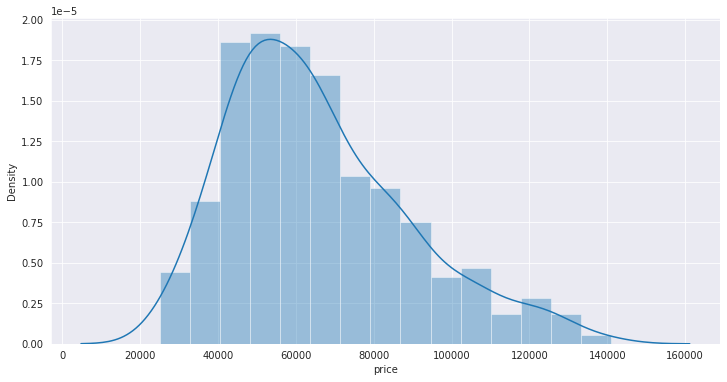

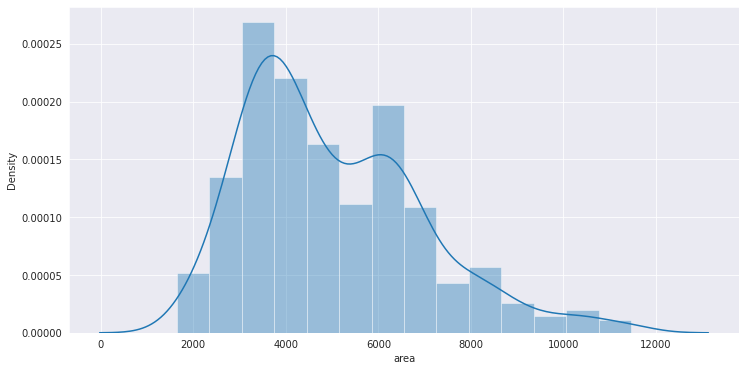

In [197]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house_new_data['price'])
plt.show()
sns.distplot(house_new_data['area'])
plt.show()

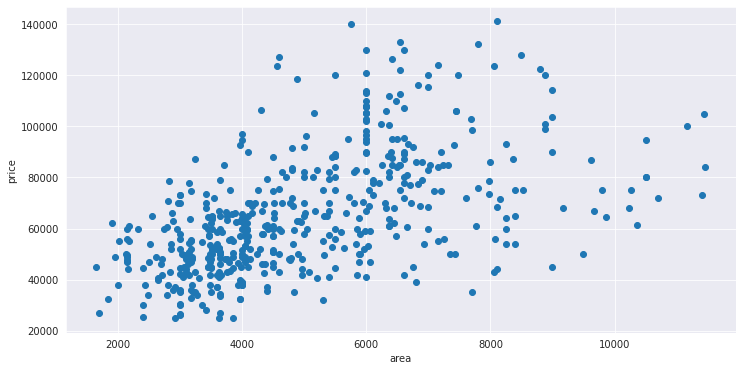

In [198]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house_data['area'], house_data['price'], palette = 'viridis')
plt.scatter(house_new_data['area'], house_new_data['price'])
plt.xlabel("area")
plt.ylabel("price")
plt.show()


**Standarising Quantiative Variables(Features not target)**

In [199]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
house_data_record = house_new_data.copy()

#Applying Standardisation on Features
scaler = StandardScaler()
house_data_record[house_data_record.columns[1:]] = scaler.fit_transform(house_data_record[house_data_record.columns[1:]])

house_data_record.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,air,garage,situation
0,42000,0.431479,0.114919,-0.559605,0.237484,0.407293,-0.469094,1.366681,-0.696505,0.416596,-0.556517
1,38500,-0.527748,-1.318693,-0.559605,-0.901982,0.407293,-0.469094,-0.731700,-0.696505,-0.771297,-0.556517
2,49500,-1.015139,0.114919,-0.559605,-0.901982,0.407293,-0.469094,-0.731700,-0.696505,-0.771297,-0.556517
3,60500,0.846280,0.114919,-0.559605,0.237484,0.407293,2.131770,-0.731700,-0.696505,-0.771297,-0.556517
4,61000,0.695915,-1.318693,-0.559605,-0.901982,0.407293,-0.469094,-0.731700,-0.696505,-0.771297,-0.556517


In [200]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Before Standard Scaler
x_before = house_new_data.drop(columns='price')
y_before = house_new_data['price']

#After Standard Scaler
x_after = house_data_record.drop(columns='price')
y_after = house_data_record['price']

print(x_after.shape)
print(y_after.shape)

(499, 10)
(499,)


In [201]:
X_train, X_test, y_train, y_test = train_test_split(x_after, y_after, test_size=0.2, random_state=101)

In [202]:
# We now instatiate a Linear Regression object
#lm = LinearRegression()

#regression_model = lm.fit(X_train, y_train)
#print(lm.score(X_test, y_test) * 100)

#predictions = lm.predict(X_test)


In [203]:
import statsmodels.api as sm
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
model = res.fit()
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     40.04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.06e-28
Time:                        18:14:38   Log-Likelihood:                -1069.9
No. Observations:                 100   AIC:                             2162.
Df Residuals:                      89   BIC:                             2190.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.855e+04   1182.712     57.963      0.000    6.62e+04    7.09e+04
area        7611.6937   1313.513      5.795      0.000    5001.771    1.02e+04
rooms       3287.6251   1434.554      2.292      0.024     437.196    6138.054
bathroom    4709.0252   1319.072      3.570      0.001    2088.057    7329.993
floors      4113.2355   1391.994      2.955      0.004    1347.373    6879.098
driveway    3149.2883   1128.406      2.791      0.006     907.169    5391.408
game_room   5456.3310   1600.743      3.409      0.001    2275.689    8636.973
cellar      3570.9039   1529.387      2.335      0.022     532.045    6609.763
air         7838.1340   1327.950      5.902      0.000    5199.525    1.05e+04
garage       463.5145   1426.099      0.325      0.746   -2370.113    3297.142
situation   2000.2144   1390.202      1.439      0.154    -762.087    4762.516
==============================================================================
Omnibus:                        0.791   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.539
Skew:                           0.177   Prob(JB):                        0.764
Kurtosis:                       3.061   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
import numpy as np
from sklearn import metrics

#print('MAE :', metrics.mean_absolute_error(y_test, predictions))
#print('MSE :', metrics.mean_squared_error(y_test, predictions))
#print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

In [205]:
predictions = model.predict(X_endog)
predictions.head()

270     69558.876173
538     94752.952447
360    122116.123437
496     57216.021930
170     49069.238772
dtype: float64